Import Library

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Prepare Data

In [21]:
train_dir = '/content/drive/MyDrive/Latihan/training'
val_dir = '/content/drive/MyDrive/Latihan/validation'
test_dir ='/content/drive/MyDrive/Latihan/test'
target_size = (32,32)
classes = 4

train_datagen = ImageDataGenerator(rescale=1./255,
                                   #horizontal_flip=True,
                                   #vertical_flip=True,
                                   #rotation_range=45,
                                   #zoom_range=0.1,
                                   #validation_split=0.3
                                   )

val_datagen = ImageDataGenerator(rescale=1./255,
                                 #horizontal_flip=True,
                                  # vertical_flip=True,
                                   #rotation_range=90,
                                   #zoom_range=0.1,
                                 )
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size=target_size,
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle=True,
                                              class_mode='categorical',
                                              #subset='training'
                                              )

val_gen = val_datagen.flow_from_directory(val_dir,
                                            target_size=target_size,
                                            batch_size=32,
                                            color_mode='rgb',
                                            shuffle=False,
                                            class_mode='categorical',
                                            #subset='validation'
                                            )

test_gen = test_datagen.flow_from_directory(test_dir,
                                            target_size=target_size,
                                            batch_size=32,
                                            color_mode='rgb',
                                            shuffle=False,
                                            class_mode='categorical',
                                            #subset='validation'
                                            )
#num_class = test_generator.num_classes
labels_train = train_gen.class_indices.keys()
labels_val = val_gen.class_indices.keys()
print(labels_train)
print(labels_val)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
dict_keys(['blight', 'gray', 'healthy', 'rust'])
dict_keys(['blight', 'gray', 'healthy', 'rust'])


Create Model

In [22]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = Sequential()
model.add(Conv2D(32,kernel_size=3,strides=1,activation='relu',
                 #padding='same',
                 input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=1))

model.add(Conv2D(64,kernel_size=3,strides=1,activation='relu',
                 #padding='same'
                 ))
model.add(MaxPooling2D(pool_size=(2,2),strides=1))

#model.add(Conv2D(128,
                  #64,
 #                kernel_size=3,strides=1,activation='relu',
                 #padding='same'
#                 ))
#model.add(MaxPooling2D(pool_size=(2,2),strides=1))

#model.add(Conv2D(128,kernel_size=3,strides=1,activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2),strides=1))

model.add(Flatten())
model.add(Dropout(0.5))#tes 1 0,5 #testing 2 menaikkan menjadi 0,6
#model.add(Dense(64,activation='relu'))
#model.add(Dense(256,activation='relu'))# testing 2
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 43264)             0         
                                                                 
 dropout_2 (Dropout)         (None, 43264)            

Compile model

In [24]:
history = model.fit_generator(
    train_gen,epochs=20,validation_data=val_gen, 
    #callbacks=[callback]
)

<ipython-input-24-a76ff0ca7a6f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 31s 300ms/step - loss: 1.0874 - accuracy: 0.4941 - val_loss: 0.7446 - val_accuracy: 0.7038
Epoch 2/20
100/100 [==============================] - 29s 287ms/step - loss: 0.7811 - accuracy: 0.6591 - val_loss: 0.6659 - val_accuracy: 0.7325
Epoch 3/20
100/100 [==============================] - 30s 296ms/step - loss: 0.6266 - accuracy: 0.7425 - val_loss: 0.5984 - val_accuracy: 0.7437
Epoch 4/20
100/100 [==============================] - 32s 317ms/step - loss: 0.5346 - accuracy: 0.7925 - val_loss: 0.3524 - val_accuracy: 0.8938
Epoch 5/20
100/100 [==============================] - 29s 287ms/step - loss: 0.4777 - accuracy: 0.8225 - val_loss: 0.3362 - val_accuracy: 0.8725
Epoch 6/20
100/100 [==============================] - 29s 285ms/step - loss: 0.3384 - accuracy: 0.8784 - val_loss: 0.2654 - val_accuracy: 0.8988
Epoch 7/20
100/100 [==============================] - 30s 296ms/step - loss: 0.2898 - accuracy: 0.8969 - val_loss: 0.1693 - val_ac

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
prediksi = model.predict(test_gen) #_generator
y_pred = np.argmax(prediksi, axis = 1)
labels_val = val_gen.class_indices.keys()
print(labels_train)
print(confusion_matrix(test_gen.classes,y_pred))


25/25 [==============================] - 2s 80ms/step
dict_keys(['blight', 'gray', 'healthy', 'rust'])
[[197   2   0   1]
 [  1 198   1   0]
 [  1   2 197   0]
 [  0   1   1 198]]


In [26]:
print(classification_report(test_gen.classes,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       200
           1       0.98      0.99      0.98       200
           2       0.99      0.98      0.99       200
           3       0.99      0.99      0.99       200

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



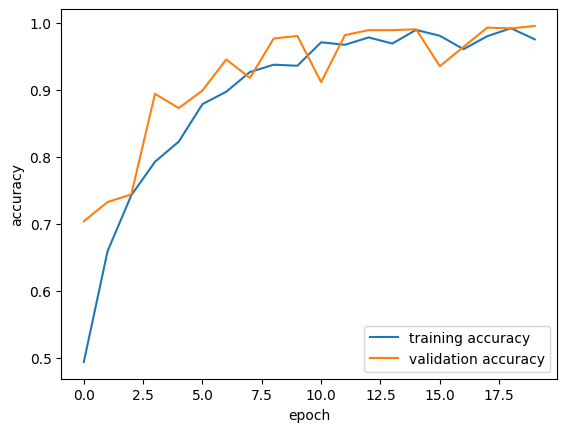

In [27]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

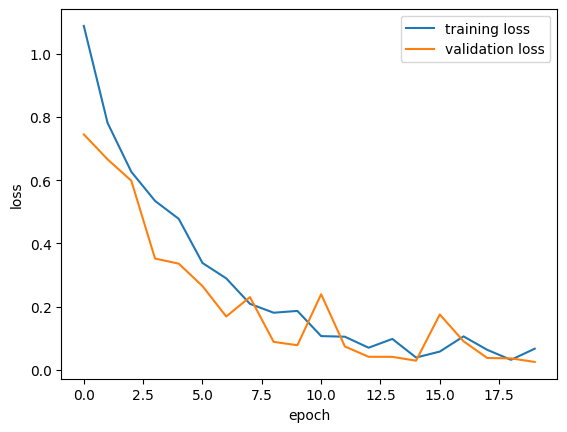

In [28]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()